<center><a href="https://ibb.co/cJD6pSW"><img src="https://i.ibb.co/y0W6Mcz/cover-depan.jpg" alt="cover-depan" border="0"></a></center>

# Kecurangan kartu kredit
Mentor: Mega Bagus Herlambang, PhD

<hr>

Kita akan membahas kasus kecurangan kartu kredit untuk memberikan gambaran bagaimana nantinya proses klasifikasi *non-performing loan* bisa dibuat model *machine learning*-nya.

<br>

## Download data terlebih dahulu
Link download dataset: https://bit.ly/39g52lF

<br>

## Menggunakan Neural Network

In [1]:
# Mengimpor library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from keras.utils.vis_utils import plot_model

In [2]:
# Membaca data
df = pd.read_csv('data_kartu_kredit.csv')

In [3]:
# Melihat 15 baris pertama
df.head(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Terdapat beberapa kolom:
- `Time` menunjukkan waktu transaksi di hari ke berapa. Jika nol artinya dilakukan pada saat awal (hari ke nol).
- `V1` sampai dengan `V28` adalah data nasabah yang sudah distandardisasi (berpusat di nilai rataan nol). Hal ini untuk menjaga rahasia data nasabah.
- `Amount` adalah nilai transaksi dalam US Dollar.
- `Class` adalah label kategori (0/1) di mana 0 menyatakan tidak terjadi kecurangan, smeentara 1 adalah curang. Proporsi angka 1 sangat kecil.

In [4]:
# Melihat dimensi datanya
df.shape

(284807, 31)

Terdapat 284 ribu baris dan 31 kolom.

Dari semua baris kolom, ada kolom `Amount` yang bentuknya masih data asli. <br>
Oleh karena itu kita harus merubahnya menjadi bentuk standar menggunakan `StandardScaler()` dari scikit-learn.

Hasil standardisasinya kita simpan ke dalam kolom baru dengan nama `std_amount`.

In [5]:
# Melakukan standardisasi untuk kolom `Amount`
df['std_amount'] = StandardScaler().fit_transform(df['Amount'].to_numpy().reshape(-1,1))

In [6]:
# Melihat tabel df
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,std_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0,-0.338556
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0,-0.333279
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0,-0.190107
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0,0.019392
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0,-0.338516


Sekarang kita sudah memiliki kolom baru `std_amount` di posisi paling kanan.

Sekarang kita tentukan variabel independen (X) dan variabel dependen (y).
- Untuk variabel independen (X) tidak kita ikutkan 3 kolom yaitu `Time`, `Amount`, dan `Class`. 
- Untuk variabel dependen (y) kita pilih kolom `Class`.

In [7]:
# Menentukan variabel independen (X) dan dependen (y)
X = df.drop(['Time', 'Amount', 'Class'], axis=1)
y = df.iloc[:,-2]

In [8]:
# Melihat dimensi X
X.shape

(284807, 29)

Terdapat 29 input yang harus kita siapkan untuk modelnya nanti.

In [9]:
# Membagi data menjadi training dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

Sekarang kita akan mencoba menggunakan *neural network*. <br>
Idealnya untuk proses evaluasi model, maka digunakan *cross validation*.<br>
Namun jika menggunakan *neural network*, maka prosesnya bisa sangat lama.<br>
Maka yang akan kita lakukan adalah 1x *cross validation*, di mana kita perlu membagi data *training set* menjadi *training* dan *validation set*.

In [10]:
# Membagi data menjadi training set dan validation set
X_train, X_validate, y_train, y_validate = train_test_split(X_train , y_train, test_size = 0.2, random_state=0)

Sekarang kita rancang ANN (*artificial neural network*) kita.

In [11]:
# Perintah pertama untuk menyiapkan ANN
classifier = Sequential()

# Perintah kedua untuk menambahkan layer pertama sebanyak 16 neuron, input sebanyak 29 variabel, dengan fungsi aktivasi ReLu
classifier.add(Dense(units=16, input_dim = 29, activation='relu'))

# Menambah hidden layer sebanyak 24 neuron
classifier.add(Dense(24, activation='relu'))

# Menambahkan layer dropout untuk menghindari overfitting
classifier.add(Dropout(0.25))

# Menambah lagi hidden layer sebanyak 20 neuron dengan fungsi aktivasi ReLu
classifier.add(Dense(20, activation='relu'))

# Menambah lagi hidden layer sebanyak 24 neuron dengan fungsi aktivasi ReLu
classifier.add(Dense(24, activation='relu'))

# Menambah output layer sebanyak 1 neuron dengan fungsi aktivasi Sigmoid (untuk klasifikasi binary)
classifier.add(Dense(1, activation='sigmoid'))

# Compiler ANN dengan metrik yang ingin dicari adalah akurasi
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Ringkasan desainnya
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-trainabl

In [12]:
# Visualisasi Model
plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [13]:
# Proses training model ANN
run_model = classifier.fit(X_train,y_train,
                           batch_size = 32,
                           epochs = 5, 
                           verbose = 1,
                           validation_data = (X_validate, y_validate))

Epoch 1/5
5697/5697 [==============================] - 16s 2ms/step - loss: 0.0105 - accuracy: 0.9984 - val_loss: 0.0036 - val_accuracy: 0.9995
Epoch 2/5
5697/5697 [==============================] - 15s 3ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0031 - val_accuracy: 0.9995
Epoch 3/5
5697/5697 [==============================] - 18s 3ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 4/5
5697/5697 [==============================] - 14s 2ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9995
Epoch 5/5
5697/5697 [==============================] - 14s 2ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9995


In [14]:
# Melihat parameter apa saja yang disimpan
print(run_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


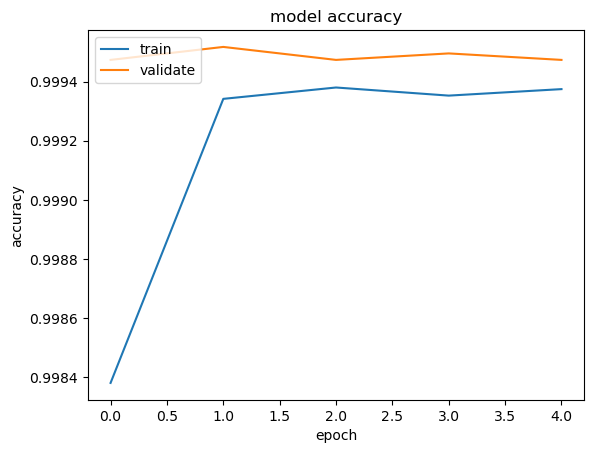

In [15]:
# Proses plotting accuracy selama proses training
plt.plot(run_model.history['accuracy'])
plt.plot(run_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

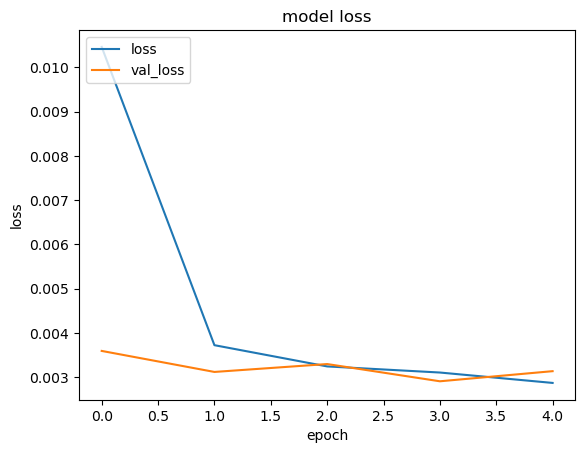

In [16]:
# Proses plotting loss selama proses training
plt.plot(run_model.history['loss'])
plt.plot(run_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [17]:
# Mengevaluasi model
evaluasi = classifier.evaluate(X_test, y_test)
print('Test Accuracy : {:.2f}%'.format(evaluasi[1]*100))

1781/1781 [==============================] - 3s 2ms/step - loss: 0.0035 - accuracy: 0.9994
Test Accuracy : 99.94%


In [18]:
# Mulai menguji model ke test set
hasil_prediksi = (classifier.predict(X_test) > 0.5).astype(int)

1781/1781 [==============================] - 3s 2ms/step


In [19]:
# Melihat hasil prediksi
hasil_prediksi

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [20]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, hasil_prediksi)

In [21]:
# Melihat cm
cm

array([[56848,    13],
       [   22,    79]], dtype=int64)

In [22]:
# Membuat confusion matrix dalam bentu tabel dataframe
cm_label = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
cm_label.index.name = 'Actual'
cm_label.columns.name = 'Predicted'

In [23]:
# Melihat cm_label
cm_label

Predicted,0,1
Actual,,
0,56848,13
1,22,79


Bisa dilihat di sini bahwa datanya sangat tidak balanced (*imbalanced dataset*). Oleh karena itu perlu dilakukan balancing dulu.

<Axes: xlabel='Predicted', ylabel='Actual'>

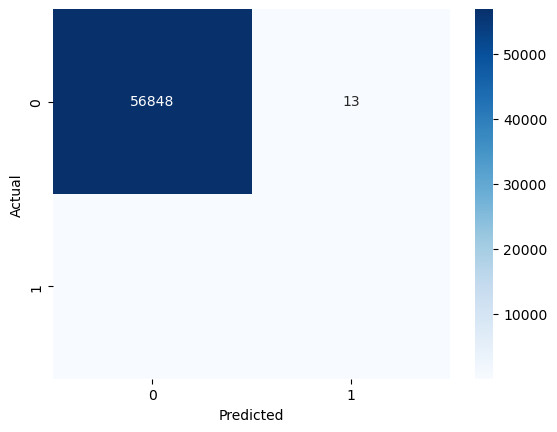

In [24]:
# Plot confusion matrix
sns.heatmap(cm_label, annot=True, cmap='Blues', fmt='g')

In [25]:
# Menggunakan classification_report dari scikit-learn
jumlah_kategori = 2
target_names = ["Class {}".format(i) for i in range(jumlah_kategori)]
print(classification_report(y_test, hasil_prediksi, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00     56861
     Class 1       0.86      0.78      0.82       101

    accuracy                           1.00     56962
   macro avg       0.93      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [26]:
# Melihat proporsi targetnya
print(y.value_counts()/len(y))

Class
0    0.998273
1    0.001727
Name: count, dtype: float64


<br><hr><br>

## Balancing Dataset

In [27]:
# Balancind dataset dengan Undersampling
ros = RandomUnderSampler(
    sampling_strategy= 'auto', # sampling minority class
    random_state= 0, # for reproducibility
    replacement=True 
)  
X_res, y_res = ros.fit_resample(X, y)

In [28]:
# Melihat dimensi
print(X_res.shape)
print(y_res.shape)

(984, 29)
(984,)


In [29]:
# Melihat proporsi targetnya setelah resampling
print(y_res.value_counts()/len(y_res))

Class
0    0.5
1    0.5
Name: count, dtype: float64


Sekarang kita sudah memiliki dataset yang sudah balanced.<br>
Kita bagi datasetnya menjadi 2 yaitu training set dan test set final.

Training set digunakan untuk training (membangun model), sementara test set final digunakan untuk evaluasi model akhir.

In [30]:
# Membagi ke training set dan test set final 
X_train2, X_test_final, y_train2, y_test_final = train_test_split(X_res, y_res, test_size = 0.1, random_state=0, stratify=y_res)

In [31]:
# Melihat data X_train2
X_train2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,std_amount
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818
255822,2.038687,-0.071701,-1.468237,1.054372,0.658919,0.347260,-0.002837,-0.022811,0.526842,0.328053,...,-0.206482,0.072413,0.498103,-0.175714,-1.362246,0.487578,-0.397709,0.017997,-0.072889,-0.313289
127243,0.959736,-0.663255,1.130273,0.204162,-1.292731,-0.248267,-0.608348,0.111987,0.933822,-0.426476,...,0.107422,0.049590,0.072129,0.038846,0.476113,-0.069933,0.997911,-0.040605,0.034941,0.093197
94340,-1.043258,0.620814,1.877629,0.522973,-0.487139,0.085217,-0.040953,-0.059857,0.643296,0.089415,...,-0.159602,0.047641,0.291211,0.121146,0.082520,-0.636100,0.277300,-0.492029,0.241602,-0.307251
74794,-6.003422,-3.930731,-0.007045,1.714669,3.414667,-2.329583,-1.901512,-2.746111,0.887673,-0.049233,...,-4.128186,1.101671,-0.992494,-0.698259,0.139898,-0.205151,-0.472412,1.775378,-0.104285,0.893814


In [32]:
# Melihat data y_train2
y_train2.head()

280149    1
255822    0
127243    0
94340     0
74794     1
Name: Class, dtype: int64

In [33]:
# Melihat proporsi dependen variabel di y_train2
print(y_train2.value_counts()/len(y_train2))

Class
1    0.500565
0    0.499435
Name: count, dtype: float64


Sekarang `X_train2` dan `y_train2` kita bagi lagi menjadi `X_train2`,`y_train2` untuk mentraining model kita, dan `X_test2`, `y_test2` untuk mengevaluasi modelnya.

In [34]:
# Membagi data ke training dan test set (untuk ANN)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train2, y_train2, test_size = 0.2, random_state=0)

In [35]:
# Melihat dimensi X_train2 dan y_train2
print(X_train2.shape)
print(y_train2.shape)

(708, 29)
(708,)


In [36]:
# Melihat proporsi dependen variabel di y_train2 (setelah displitting lagi)
print(y_train2.value_counts()/len(y_train2))

Class
0    0.50565
1    0.49435
Name: count, dtype: float64


Karena kita ingin memastikan bahwa model kita sudah baik, kita memerlukan validation set.<br>
Oleh karena itu `X_train2` dan `y_train2` kita bagi lagi menjadi `X_train2`,`y_train2` untuk mentraining model kita, dan `X_validate2`, `y_validate2` untuk memvalidasi (evaluasi) modelnya.

In [37]:
# Membagi data training set menjadi training set dan validation set
X_train2, X_validate2, y_train2, y_validate2 = train_test_split(X_train2 , y_train2, test_size = 0.2, random_state=111)

In [38]:
# Melihat dimensi X_train2 dan y_train2
print(X_train2.shape)
print(y_train2.shape)

(566, 29)
(566,)


In [39]:
# Melihat dimensi X_train2 dan y_train2
print(X_validate2.shape)
print(y_validate2.shape)

(142, 29)
(142,)


In [40]:
# Melihat proporsi dependen variabel di y_train2 (setelah displitting lagi)
print(y_train2.value_counts()/len(y_train2))

Class
0    0.501767
1    0.498233
Name: count, dtype: float64


In [41]:
# Melihat proporsi dependen variabel di y_train2 (setelah displitting lagi)
print(y_validate2.value_counts()/len(y_validate2))

Class
0    0.521127
1    0.478873
Name: count, dtype: float64


In [42]:
# Merancang ANN
classifier2 = Sequential()
classifier2.add(Dense(units=16, input_dim = 29, activation='relu'))
classifier2.add(Dense(24, activation='relu'))
classifier2.add(Dropout(0.25))
classifier2.add(Dense(20, activation='relu'))
classifier2.add(Dense(24, activation='relu'))
classifier2.add(Dense(1, activation='sigmoid'))
classifier2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                480       
                                                                 
 dense_6 (Dense)             (None, 24)                408       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_7 (Dense)             (None, 20)                500       
                                                                 
 dense_8 (Dense)             (None, 24)                504       
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-traina

In [43]:
# Menjalankan model ANN yang sudah diresampling
run_model2 = classifier2.fit(X_train2, y_train2,
                             batch_size = 8,
                             epochs = 5, 
                             verbose = 1,
                             validation_data = (X_validate2, y_validate2))

Epoch 1/5
71/71 [==============================] - 2s 5ms/step - loss: 0.4996 - accuracy: 0.6007 - val_loss: 0.5018 - val_accuracy: 0.7958
Epoch 2/5
71/71 [==============================] - 0s 2ms/step - loss: 0.3625 - accuracy: 0.9205 - val_loss: 0.4729 - val_accuracy: 0.9085
Epoch 3/5
71/71 [==============================] - 0s 2ms/step - loss: 0.2545 - accuracy: 0.9293 - val_loss: 0.4679 - val_accuracy: 0.9085
Epoch 4/5
71/71 [==============================] - 0s 2ms/step - loss: 0.1813 - accuracy: 0.9435 - val_loss: 0.5147 - val_accuracy: 0.9014
Epoch 5/5
71/71 [==============================] - 0s 2ms/step - loss: 0.1452 - accuracy: 0.9470 - val_loss: 0.5101 - val_accuracy: 0.9155


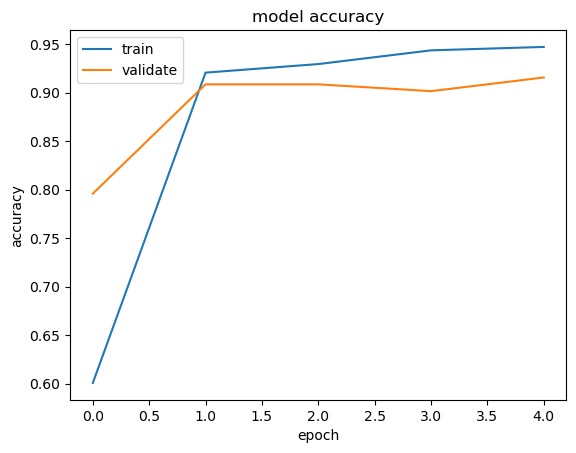

In [44]:
# Proses plotting accuracy selama proses training
plt.plot(run_model2.history['accuracy'])
plt.plot(run_model2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

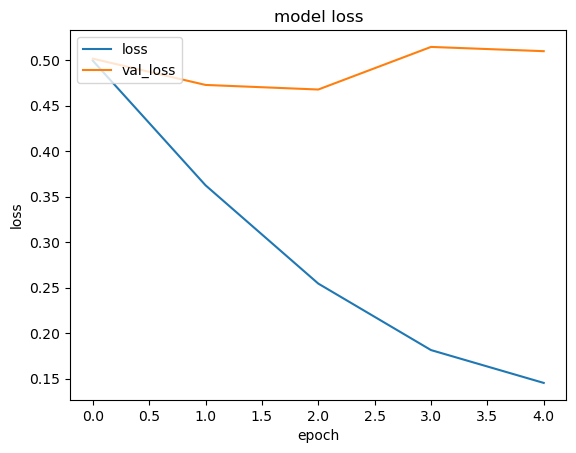

In [45]:
# Proses plotting loss selama proses training
plt.plot(run_model2.history['loss'])
plt.plot(run_model2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [46]:
# Mengevaluasi model
evaluasi2 = classifier2.evaluate(X_test2, y_test2)
print('Test Accuracy : {:.2f}%'.format(evaluasi2[1]*100))

6/6 [==============================] - 0s 2ms/step - loss: 0.1418 - accuracy: 0.9548
Test Accuracy : 95.48%


In [47]:
# Mulai menguji model ke test set
hasil_prediksi2 = (classifier2.predict(X_test2) > 0.5).astype(int)

6/6 [==============================] - 0s 2ms/step


In [48]:
hasil_prediksi2

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
    

In [49]:
# Membuat confusion matrix
cm2 = confusion_matrix(y_test2, hasil_prediksi2)
cm2

array([[83,  1],
       [ 7, 86]], dtype=int64)

In [50]:
# Membuat classification report
cm2_label = pd.DataFrame(cm2, columns=np.unique(y_test2), index = np.unique(y_test2))
cm2_label.index.name = 'Actual'
cm2_label.columns.name = 'Predicted'
print(classification_report(y_test2, hasil_prediksi2, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.92      0.99      0.95        84
     Class 1       0.99      0.92      0.96        93

    accuracy                           0.95       177
   macro avg       0.96      0.96      0.95       177
weighted avg       0.96      0.95      0.95       177



<Axes: xlabel='Predicted', ylabel='Actual'>

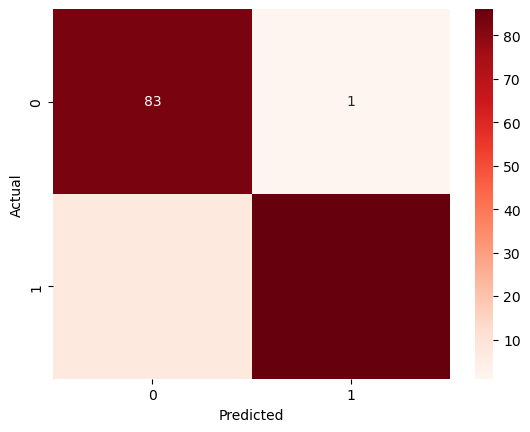

In [51]:
# Plot confusion matrix
sns.heatmap(cm2_label,annot=True, cmap='Reds', fmt='g')

In [52]:
# Memprediksi dataset asli
hasil_prediksi3 = (classifier2.predict(X_test_final) > 0.5).astype(int)

# Membuat confusion matrix
cm3 = confusion_matrix(y_test_final, hasil_prediksi3)

# Membuat confusion matrix format tabel
cm3_label = pd.DataFrame(cm3, columns=np.unique(y_test_final), index = np.unique(y_test_final))
cm3_label.index.name = 'Actual'
cm3_label.columns.name = 'Predicted'

4/4 [==============================] - 0s 2ms/step


<Axes: xlabel='Predicted', ylabel='Actual'>

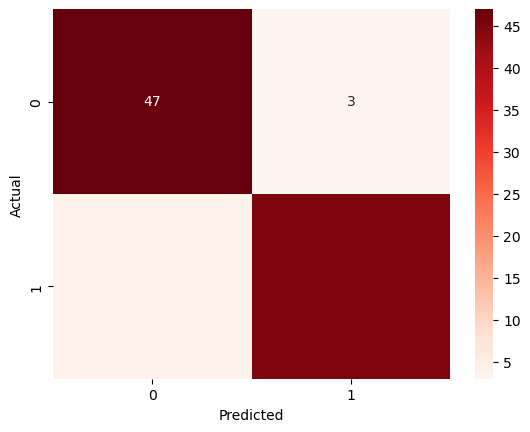

In [53]:
# Plot confusion matrix
sns.heatmap(cm3_label,annot=True, cmap='Reds', fmt='g')

In [54]:
# Mengevaluasi model akhir di test set final
evaluasi3 = classifier2.evaluate(X_test_final, y_test_final)
print('Test Accuracy : {:.2f}%'.format(evaluasi3[1]*100))

4/4 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.9293
Test Accuracy : 92.93%


In [55]:
# Membuat classification report
jumlah_kategori = 2
target_names = ["Class {}".format(i) for i in range(jumlah_kategori)]
print(classification_report(y_test_final, hasil_prediksi3, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.92      0.94      0.93        50
     Class 1       0.94      0.92      0.93        49

    accuracy                           0.93        99
   macro avg       0.93      0.93      0.93        99
weighted avg       0.93      0.93      0.93        99



Sekarang kita lakukan training ulang model ke dalam dataset utuh yang sudah balanced.

Kita buat ulang struktur model ANN-nya

In [56]:
# Training model terhadap dataset utuh (X_res dan y_res)
final_model = Sequential()
final_model.add(Dense(units=16, input_dim = 29, activation='relu'))
final_model.add(Dense(24, activation='relu'))
final_model.add(Dropout(0.25))
final_model.add(Dense(20, activation='relu'))
final_model.add(Dense(24, activation='relu'))
final_model.add(Dense(1, activation='sigmoid'))
final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
final_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                480       
                                                                 
 dense_11 (Dense)            (None, 24)                408       
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_12 (Dense)            (None, 20)                500       
                                                                 
 dense_13 (Dense)            (None, 24)                504       
                                                                 
 dense_14 (Dense)            (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-traina

In [57]:
# Fitting model ke X_res dan y_res
run_final = final_model.fit(X_res, y_res,
                            batch_size = 8,
                            epochs = 5, 
                            verbose = 1)

Epoch 1/5
123/123 [==============================] - 1s 1ms/step - loss: 0.4282 - accuracy: 0.7917
Epoch 2/5
123/123 [==============================] - 0s 1ms/step - loss: 0.2659 - accuracy: 0.9157
Epoch 3/5
123/123 [==============================] - 0s 1ms/step - loss: 0.1982 - accuracy: 0.9319
Epoch 4/5
123/123 [==============================] - 0s 1ms/step - loss: 0.1724 - accuracy: 0.9360
Epoch 5/5
123/123 [==============================] - 0s 2ms/step - loss: 0.1828 - accuracy: 0.9411


In [58]:
# Menyimpan model
model_cc_fraud = final_model
model_cc_fraud.save('model_cc_fraud.hd5', include_optimizer=True)
print("Disimpan di komputer")

INFO:tensorflow:Assets written to: model_cc_fraud.hd5\assets


INFO:tensorflow:Assets written to: model_cc_fraud.hd5\assets


Disimpan di komputer


In [59]:
# Load model
from keras.models import load_model
model_saya = load_model('model_cc_fraud.hd5')
model_saya.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                480       
                                                                 
 dense_11 (Dense)            (None, 24)                408       
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_12 (Dense)            (None, 20)                500       
                                                                 
 dense_13 (Dense)            (None, 24)                504       
                                                                 
 dense_14 (Dense)            (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-traina

In [60]:
# Mencoba memprediksi test set final
prediksi_final = (model_saya.predict(X_test_final) > 0.5).astype(int)

# Melihat hasil prediksi
prediksi_final

4/4 [==============================] - 0s 2ms/step


array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [61]:
# Jika ingin melihat probabilitasnya
hasil = model_saya.predict(X_test_final)

4/4 [==============================] - 0s 2ms/step


In [62]:
# Melihat hasil
hasil

array([[0.2436074 ],
       [0.64152384],
       [0.06197543],
       [0.9999986 ],
       [0.9981408 ],
       [0.9833777 ],
       [0.13152042],
       [0.5296794 ],
       [0.01294391],
       [0.3056126 ],
       [0.42947218],
       [0.00707205],
       [0.0723703 ],
       [0.01109757],
       [0.73961586],
       [0.06270002],
       [0.02827921],
       [0.9999991 ],
       [0.04990763],
       [0.9999967 ],
       [0.03172225],
       [0.99543035],
       [0.99996054],
       [0.9812882 ],
       [0.9995008 ],
       [0.04040226],
       [0.9986206 ],
       [0.11844709],
       [0.77598745],
       [1.        ],
       [0.9997862 ],
       [0.99974954],
       [0.01588999],
       [0.06665928],
       [0.997926  ],
       [0.01835267],
       [0.01065738],
       [0.99789447],
       [0.98398423],
       [0.86975837],
       [0.09613615],
       [0.03148592],
       [0.9998254 ],
       [1.        ],
       [0.9999897 ],
       [0.01366066],
       [0.3782251 ],
       [0.280

In [63]:
cm_final = confusion_matrix(y_test_final, prediksi_final)

In [64]:
cm_final

array([[47,  3],
       [ 3, 46]], dtype=int64)